In [ ]:
import numpy as np
import pandas as pd
import math

import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import mean_squared_error, mean_absolute_error

def df_preview(df):
    for col in df.columns:
        print(col, "null count ::", df[col].isnull().sum(), "// mean ::", df[col].mean())

def df_col_distplot(df):
    for col in df.columns:
        print(col, "plot")
        sns.distplot(df.loc[df[col].notnull(), col])
        plt.title(col)
        plt.show()

def rmse_expm1(pred, true):
    return -np.sqrt(np.mean((np.expm1(pred)-np.expm1(true))**2))

def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train = pd.read_csv('./drive/My Drive/ml_data/wine/train.csv', index_col='index')
test = pd.read_csv('./drive/My Drive/ml_data/wine/test.csv', index_col='index')
submission = pd.read_csv('./drive/My Drive/ml_data/wine/sample_submission.csv', index_col='index')

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

In [ ]:
target_cols = ['quality']
param_cols = train.columns.drop(target_cols)
x_data = pd.get_dummies(train[param_cols], columns=['type'])
y_data = train[target_cols]

y_dummy = pd.get_dummies(y_data, columns=['quality'])

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scale_cols = x_data.columns.drop(['type_red', 'type_white'])

scale_x = x_data[scale_cols]

std_scaler = StandardScaler()
std_scaler.fit(scale_x)
scaled_feature = std_scaler.transform(scale_x)
scaled_feature = pd.DataFrame(scaled_feature, columns=scale_x.columns, index=list(scale_x.index.values))

for col_name in scaled_feature.columns:
  x_data[col_name] = scaled_feature[col_name]

x_data


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
index,,,,,,,,,,,,,
0,-1.250611,2.186377,-1.781940,0.286345,-0.398500,-1.211937,-0.560852,-0.117252,1.372128,-0.605988,-0.255287,0,1
1,1.234899,1.665574,-1.230560,-0.638755,0.322998,-1.155351,-1.307080,0.738864,-0.183584,0.398147,-0.841348,1,0
2,0.535849,-0.785265,0.492500,-0.722855,0.034399,-0.532907,0.398583,-0.966732,-1.054782,-0.070450,0.330774,0,1
3,-0.163201,-0.785265,-0.058879,0.118145,-0.283060,-0.080221,-0.134436,-0.256620,0.252016,-0.204334,0.247051,0,1
4,0.458177,0.378883,-0.403491,0.854020,0.092119,0.089537,1.109276,0.274305,-1.117010,-0.672931,0.330774,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,0.380505,-1.152890,-0.196724,-0.870030,-0.773678,-1.155351,-0.916198,-0.488900,0.812072,-0.940700,-0.339010,0,1
5493,-0.706906,-0.969078,0.285733,-0.891055,-0.629379,-0.249978,-0.081134,-1.305196,-0.370269,-0.137392,0.414497,0,1
5494,0.458177,-1.152890,0.147888,-0.912080,-0.600519,0.032951,-0.400946,-1.232194,-0.930325,1.268397,0.665666,0,1


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_dummy, test_size=0.3, random_state=0)

In [ ]:
model = Sequential()

model.add(Dense(64, input_shape=(13,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 455       
Total params: 5,511
Trainable params: 5,511
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(x_data, y_dummy, validation_data=(x_val, y_val), epochs=100)

Epoch 1/100
172/172 [==============================] - 0s 3ms/step - loss: 2.3058 - accuracy: 0.3957 - val_loss: 1.4117 - val_accuracy: 0.3733
Epoch 2/100
172/172 [==============================] - 0s 1ms/step - loss: 1.3066 - accuracy: 0.4444 - val_loss: 1.2350 - val_accuracy: 0.4758
Epoch 3/100
172/172 [==============================] - 0s 1ms/step - loss: 1.2740 - accuracy: 0.4497 - val_loss: 1.2577 - val_accuracy: 0.4800
Epoch 4/100
172/172 [==============================] - 0s 2ms/step - loss: 1.2606 - accuracy: 0.4553 - val_loss: 1.2230 - val_accuracy: 0.4782
Epoch 5/100
172/172 [==============================] - 0s 1ms/step - loss: 1.2491 - accuracy: 0.4521 - val_loss: 1.2111 - val_accuracy: 0.4800
Epoch 6/100
172/172 [==============================] - 0s 1ms/step - loss: 1.2441 - accuracy: 0.4541 - val_loss: 1.1907 - val_accuracy: 0.4921
Epoch 7/100
172/172 [==============================] - 0s 1ms/step - loss: 1.2266 - accuracy: 0.4633 - val_loss: 1.2422 - val_accuracy: 0.4545

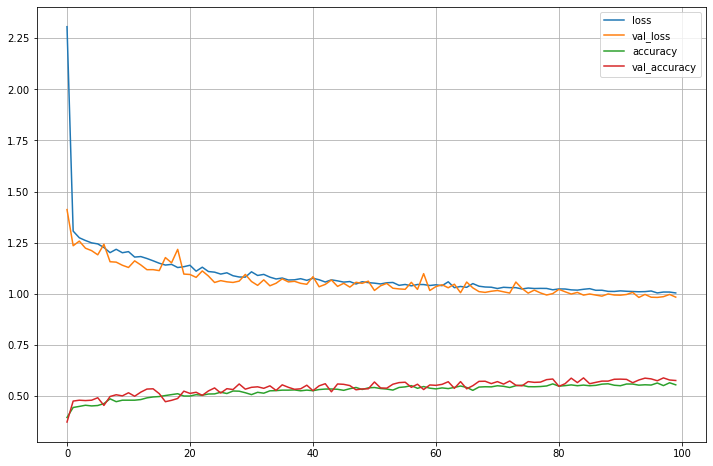

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss', 'accuracy','val_accuracy'])
plt.grid()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

concat_df = pd.concat([train, test])
concat_df.shape

concat_df_scale_cols = concat_df.columns.drop(['type'])

scale_df = concat_df[scale_cols]

std_scaler = StandardScaler()
std_scaler.fit(scale_df)


scaled_feature = std_scaler.transform(scale_df)
scaled_feature = pd.DataFrame(scaled_feature, columns=scale_df.columns, index=list(scale_df.index.values))

scaled_feature['type'] = concat_df['type']
# scaled_feature

# x_data = pd.get_dummies(train[param_cols], columns=['type'])

# for col_name in scaled_feature.columns:
#   x_data[col_name] = scaled_feature[col_name]


# x_data, y_dummy

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type'],
      dtype='object')

In [ ]:
scaled_feature.columns

for col_name in scaled_feature.columns:
  concat_df[col_name] = scaled_feature[col_name]


one_hot_encoded = pd.get_dummies(concat_df, columns=['type'])
one_hot_encoded
# concat_df

scaled_train = one_hot_encoded[one_hot_encoded['quality'].notnull()]
scaled_test = one_hot_encoded[one_hot_encoded['quality'].isnull()]

scaled_train
scaled_test

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
index,,,,,,,,,,,,,,
0,NaN,1.376723,-0.180205,1.110526,0.243149,-0.372068,-1.100140,-0.756307,-0.299033,-1.981037,-1.016626,0.929214,0,1
1,NaN,4.693770,0.548730,1.798725,-0.744778,0.398680,-0.874763,-1.340197,1.902110,-0.985856,-0.277351,-1.250860,1,0
2,NaN,-0.551792,-0.362438,-0.334694,-0.051127,-0.457706,0.759221,1.119218,0.034473,-0.177272,1.066785,-0.915464,0,1
3,NaN,-0.011808,-1.152118,0.491146,-0.765798,-0.372068,-0.536697,0.765346,0.034473,1.875288,-0.411765,-0.412370,0,1
4,NaN,-0.320370,-0.483928,-0.403514,-0.723758,-1.057177,-0.395836,-0.774000,-1.429620,-0.363868,-0.411765,1.096912,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,-0.088949,1.520643,-2.055193,-0.660699,0.741235,-0.367664,-0.384741,0.914930,2.061885,-0.008524,-0.663917,1,0
996,NaN,1.145301,-1.152118,-0.128234,-0.807837,-0.286429,-0.085943,0.252230,-0.165631,0.009325,-1.016626,-0.580068,0,1
997,NaN,1.222442,1.945855,-0.403514,-0.786818,0.512865,-1.494550,-1.640988,0.801538,-0.426067,1.402820,-1.083162,1,0


Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_56 (Dense)             (None, 1024)              66560     
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_57 (Dense)             (None, 128)               131200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 7)                 903       
Total params: 199,559
Trainable params: 199,559
Non-trainable params: 0
_______________________________________________

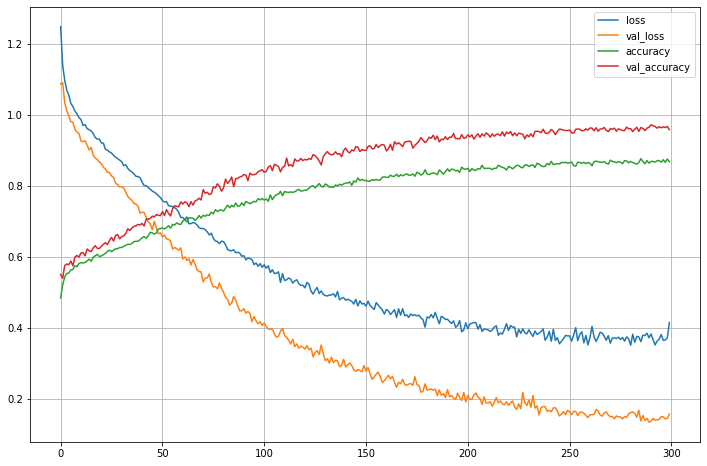

In [ ]:
from keras.optimizers import SGD, Adam

model3 = Sequential()

model3.add(Dense(64, input_shape=(13,), activation='relu'))
model3.add(Dense(1024, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(7, activation='softmax'))

model3.compile(
    loss='categorical_crossentropy', 
    optimizer='rmsprop', 
    metrics=['accuracy'])

model3.summary()

# hist3 = model3.fit(x_data, y_dummy, validation_data=(x_val, y_val), epochs=300)
hist3 = model3.fit(
    x_data, 
    y_dummy, 
    validation_data=(x_val, y_val), 
    batch_size=128, 
    epochs=300
  )

plt.figure(figsize=(12,8))
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.plot(hist3.history['accuracy'])
plt.plot(hist3.history['val_accuracy'])
plt.legend(['loss','val_loss', 'accuracy','val_accuracy'])
plt.grid()
plt.show()

In [ ]:


feature_col_list = scaled_train.columns.drop(target_cols)

x_data = scaled_train[feature_col_list]
y_data = scaled_train[target_cols]
y_data = pd.get_dummies(y_data, columns=['quality'])

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.3, random_state=0)

# target_df
# scaled_test

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_80 (Dense)             (None, 1024)              66560     
_________________________________________________________________
dropout_10 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_81 (Dense)             (None, 128)               131200    
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_82 (Dense)             (None, 7)                 903       
Total params: 199,559
Trainable params: 199,559
Non-trainable params: 0
_______________________________________________

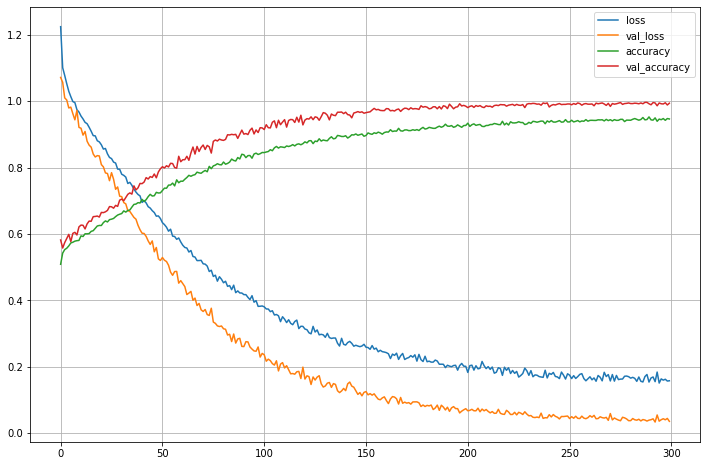

In [ ]:
model4 = Sequential()

model4.add(Dense(64, input_shape=(13,), activation='relu'))
model4.add(Dense(1024, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(7, activation='softmax'))


model4.compile(
    loss='categorical_crossentropy', 
    # optimizer=Adam(lr=0.005), 
    optimizer='rmsprop', 
    metrics=['accuracy'])

model4.summary()

hist4 = model4.fit(
    x_data, 
    y_dummy, 
    validation_data=(x_val, y_val), 
    batch_size=128, 
    epochs=300
  )

plt.figure(figsize=(12,8))
plt.plot(hist4.history['loss'])
plt.plot(hist4.history['val_loss'])
plt.plot(hist4.history['accuracy'])
plt.plot(hist4.history['val_accuracy'])
plt.legend(['loss','val_loss', 'accuracy','val_accuracy'])
plt.grid()
plt.show()

In [ ]:
test_x_data = scaled_test[feature_col_list]
# test_x_data


output = model4.predict_classes(test_x_data)
# output
# output = model4.predict(test_x_data)
# output[0]

output_category = output + 3
# output_category

# output_category.shape
submission['quality'] = output_category
submission

,quality
index,
0,4
1,6
2,6
3,5
4,7
...,...
995,5
996,6
997,5


In [ ]:
train = pd.read_csv('./drive/My Drive/ml_data/wine/train.csv', index_col='index')
train

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
index,,,,,,,,,,,,,
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,white
5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,white
5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,white


In [ ]:
submission

import time
from google.colab import files
filename = time.strftime('%Y-%m-%d-%H_%M_%S')+'submission.csv'
submission.to_csv(filename, index=True)
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>